In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from eofs.standard import Eof

import sys
import os

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [29]:
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [4]:
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.path as mpath
from matplotlib.colorbar import Colorbar

import matplotlib.ticker as mticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)


# Spatial mean

In [6]:
slp_djf = xr.open_dataset('/work/mh0033/from_Mistral/mh0033/m300883/task1/Oneper_SLP_monthly/slpdjf.nc')

In [7]:
slp_djf = slp_djf/100.0   # to hpa

In [9]:
slp_djf['time'] = pd.to_datetime(slp_djf.time,format='%Y%m%d')

In [11]:
weights = np.cos(np.deg2rad(slp_djf.lat))

In [12]:
weights

<xarray.DataArray 'lat' (lat: 32)>
array([0.18617147, 0.21804288, 0.24968617, 0.28106657, 0.31215033,
       0.3429043 , 0.37329563, 0.40329185, 0.43286112, 0.46197203,
       0.49059358, 0.5186955 , 0.54624796, 0.57322174, 0.5995881 ,
       0.62531924, 0.65038776, 0.67476714, 0.6984316 , 0.721356  ,
       0.74351585, 0.7648879 , 0.78544945, 0.80517864, 0.8240546 ,
       0.8420573 , 0.8591677 , 0.8753676 , 0.89063984, 0.9049683 ,
       0.91833776, 0.93073404], dtype=float32)
Coordinates:
  * lat      (lat) float32 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [13]:
weights.name = 'weights'

In [14]:
slpdjfw = slp_djf.weighted(weights).mean(('lon','lat')).slp

In [15]:
slpdjfw

<xarray.DataArray 'slp' (time: 151, ens: 100)>
array([[1015.2074 , 1015.7983 , 1014.72595, ..., 1013.4438 , 1016.6265 ,
        1014.20764],
       [1014.7373 , 1015.98816, 1015.5414 , ..., 1014.4616 , 1014.29645,
        1016.2126 ],
       [1013.91656, 1014.62054, 1015.5261 , ..., 1015.1367 , 1014.9995 ,
        1014.96735],
       ...,
       [1014.5804 , 1013.70123, 1016.7681 , ..., 1015.3101 , 1014.85913,
        1015.2839 ],
       [1015.1109 , 1015.9585 , 1013.7549 , ..., 1015.8591 , 1016.61554,
        1015.7569 ],
       [1017.32544, 1015.9977 , 1014.40814, ..., 1013.86694, 1015.85516,
        1014.25116]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-02-14 1851-01-31 ... 1999-12-31
Dimensions without coordinates: ens

In [26]:
data_p = slpdjfw.to_dataframe().reset_index().set_index('time')

Text(1983-01-31 00:00:00, 1016.3, '$4\\times CO_2$')

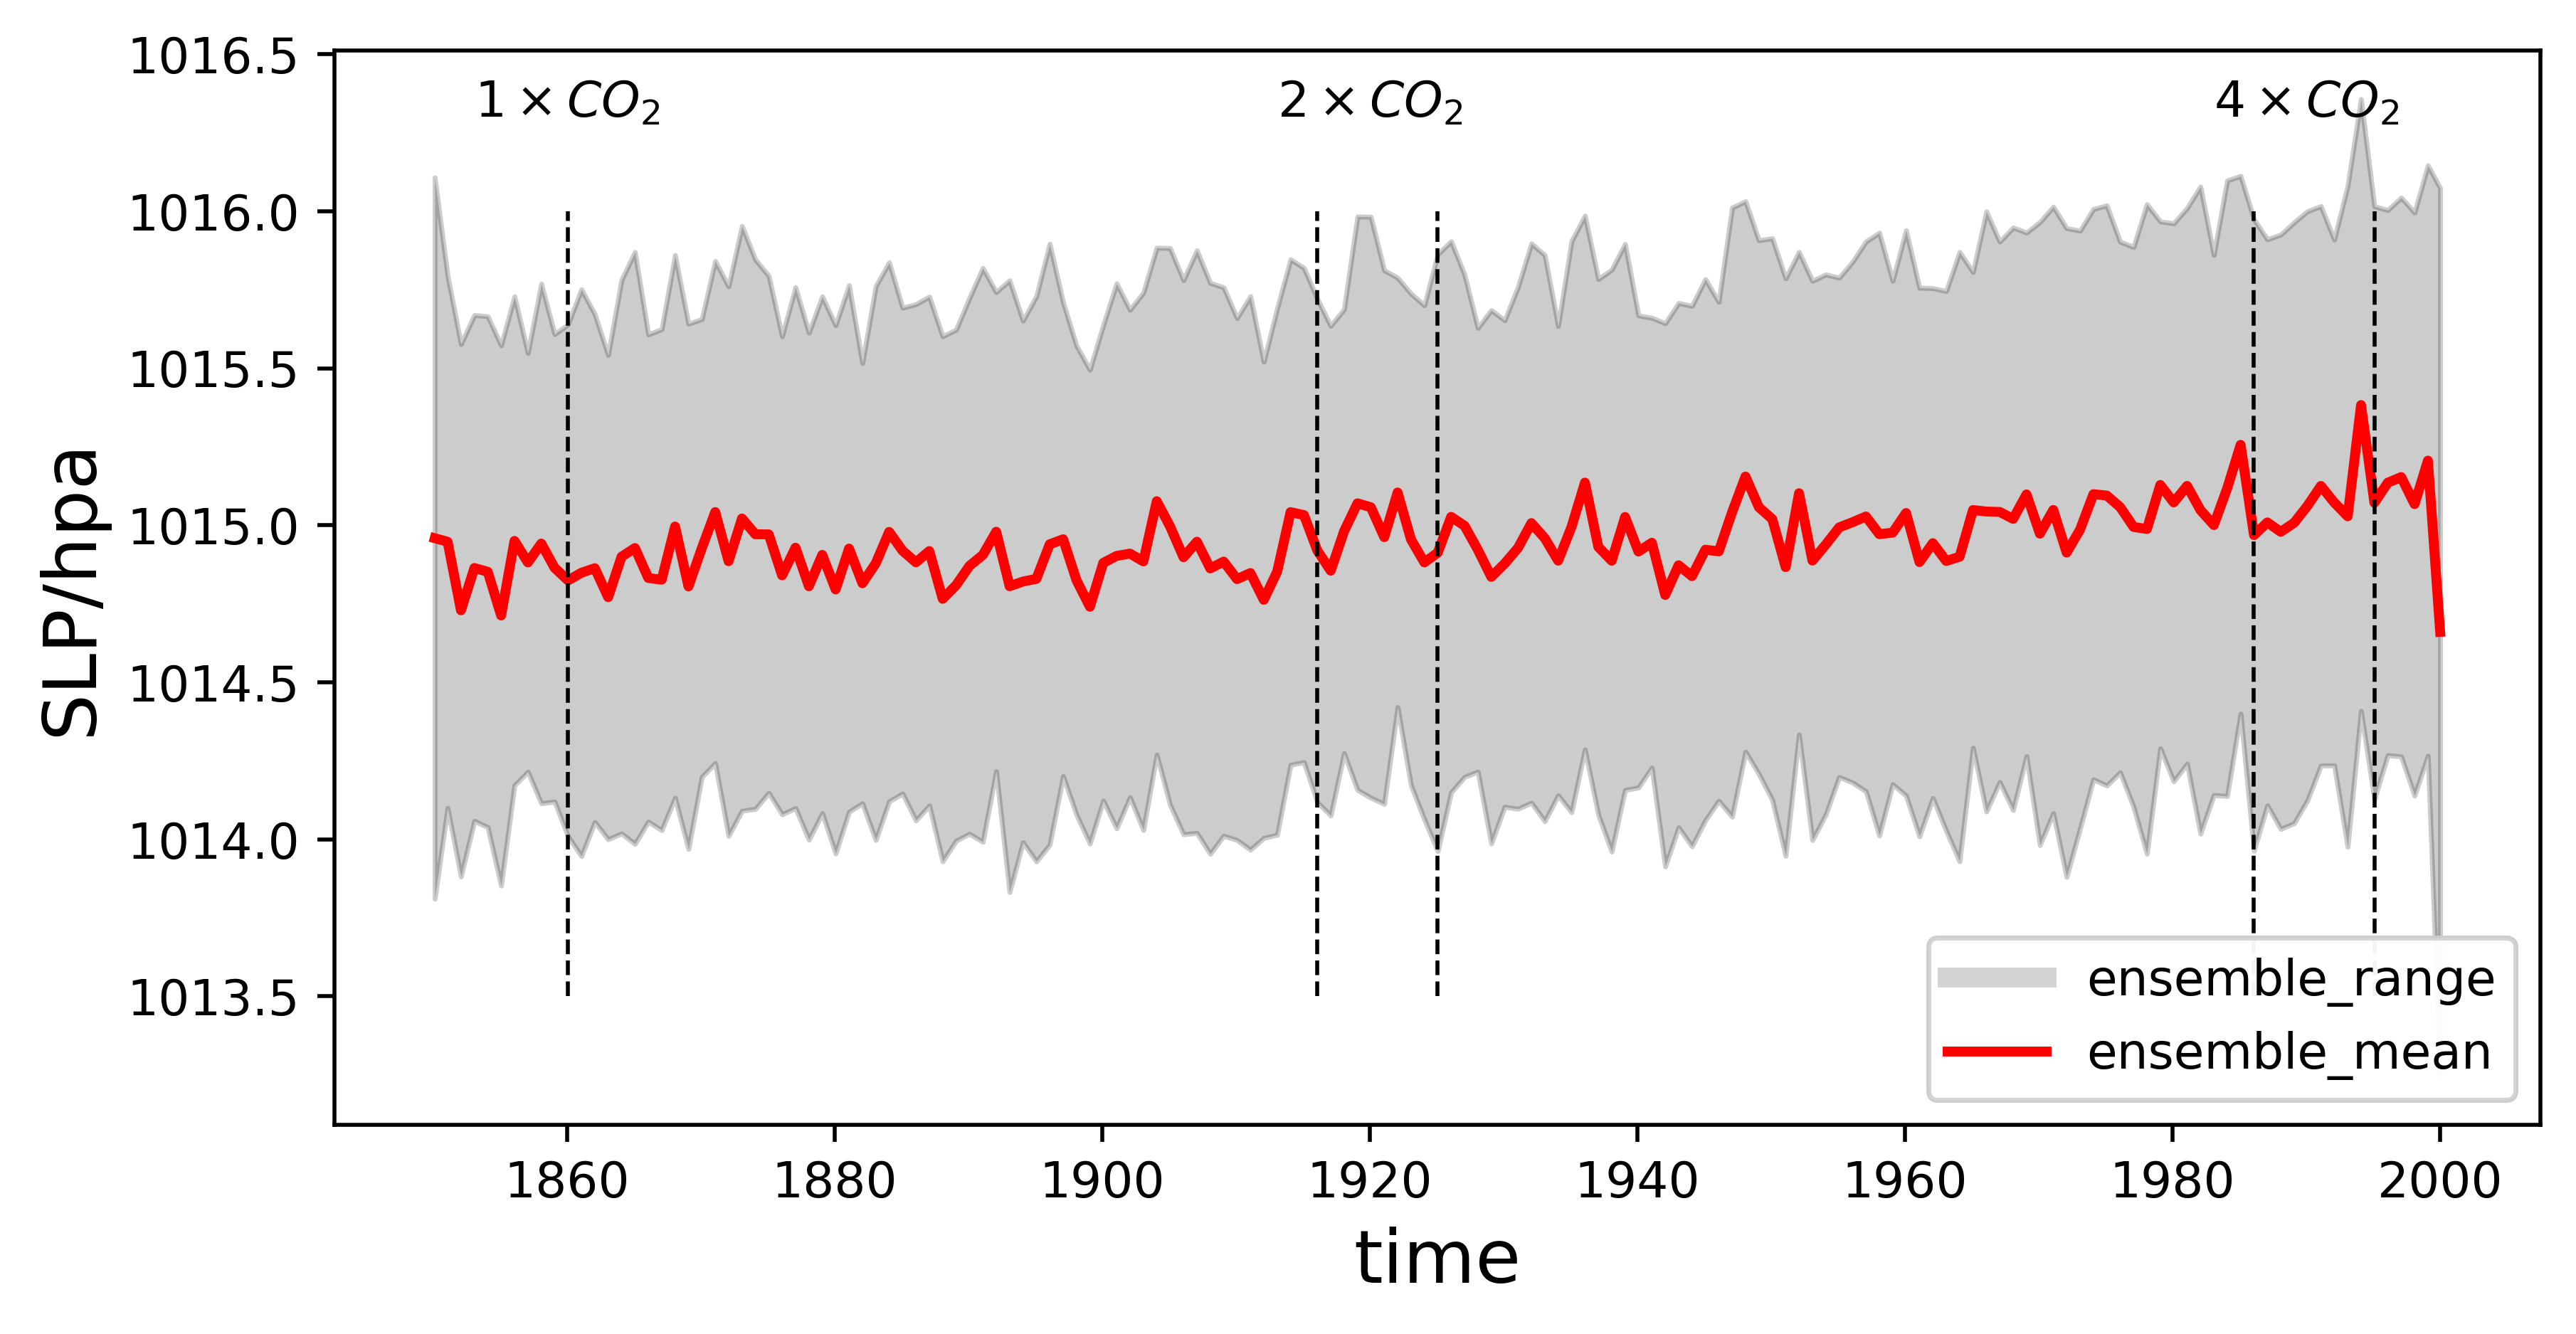

In [40]:
fig = plt.figure(figsize=(8,4),dpi=500)
ax = plt.subplot()
sns.lineplot(data = data_p['slp'],
             ci = 'sd',ax=ax,color = 'k',linewidth=0)
sns.lineplot(data = data_p['slp'],
             ci = None,ax=ax,color = 'r',linewidth=2.0)

ax.set_ylabel('SLP/hpa',fontsize = 15)
ax.set_xlabel('time',fontsize = 15)

custom_line = [Line2D([0],[0],color = 'lightgrey',linewidth=4),
                Line2D([0],[0],color = 'r', linewidth=2)
]
type_legend = ax.legend(custom_line,['ensemble_range','ensemble_mean'],loc = 'lower right')
ax.add_artist(type_legend)

ax.vlines(x = pd.to_datetime('1860-01-31'), ymin = 1013.5,ymax = 1016,linestyles='--',color = 'k',linewidth = 0.8)
ax.text(x = pd.to_datetime('1853-01-31'),y = 1016.3,s = r'$1\times CO_2$')

ax.vlines(x = pd.to_datetime('1916-01-31'), ymin = 1013.5,ymax = 1016,linestyles='--',color = 'k',linewidth = 0.8)
ax.vlines(x = pd.to_datetime('1925-01-31'), ymin = 1013.5,ymax = 1016,linestyles='--',color = 'k',linewidth = 0.8)
ax.text(x = pd.to_datetime('1913-01-31'),y =1016.3,s = r'$2\times CO_2$')

ax.vlines(x = pd.to_datetime('1986-01-31'), ymin = 1013.5,ymax = 1016,linestyles='--',color = 'k',linewidth = 0.8)
ax.vlines(x = pd.to_datetime('1995-01-31'), ymin = 1013.5,ymax = 1016,linestyles='--',color = 'k',linewidth = 0.8)
ax.text(x = pd.to_datetime('1983-01-31'),y = 1016.3,s = r'$4\times CO_2$')




